## Task g

Frederik Rogge, Mouhammad Abu Rasheed and Homa Priya Tarigopula

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np                                                                          
np.random.seed(100)


from models import *
from utils import *
from optimizers import *

In [2]:
def design_matrix(x_train, x_test):
    #now scale the data
    scaler = StandardScaler()
    scaler.fit(x_train)
    X_train_scaled = scaler.transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    return X_train_scaled , X_test_scaled

# Part g) Logistic Regression code (Wisconsin)

###  SGD Implementation from lecture notes

Test Accuracy : 
 [[0.92617606 0.92617606 0.92794597 0.94552088]
 [0.96839    0.96839    0.97893184 0.97189877]
 [0.9806707  0.98068623 0.98244061 0.97365316]
 [0.97542307 0.98244061 0.984195   0.97014439]
 [0.97366868 0.97540755 0.98244061 0.95432386]
 [0.97365316 0.96658904 0.89619624 0.91207887]]
Test loss : 
 [[0.25600857 0.25505089 0.2463752  0.21925546]
 [0.08775934 0.08741123 0.09549531 0.18039265]
 [0.08407159 0.0754527  0.09366186 0.18086614]
 [0.12960701 0.07805282 0.09298945 0.17976404]
 [0.12691793 0.07467976 0.0907939  0.1858464 ]
 [0.18627542 0.14223753 0.47710077 0.24863021]]


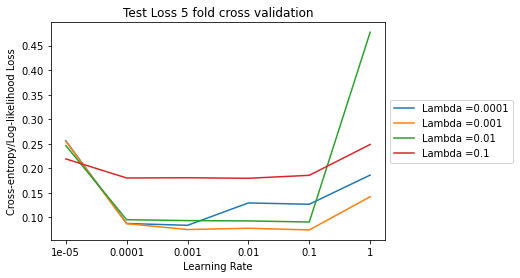

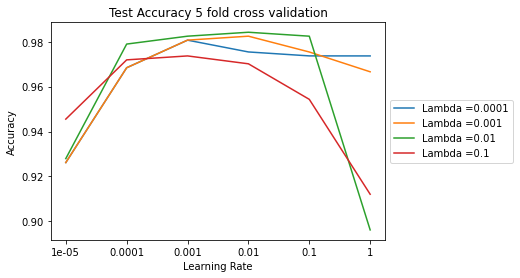

In [3]:
# Load the data
cancer = load_breast_cancer()
X, y =cancer.data,cancer.target

## Cross-validation based Logistic regression
ksplits = 5
kfold = KFold(n_splits = ksplits )
lr_eta = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
Lambdas = [1e-4, 1e-3, 1e-2, 1e-1]

est_test_acc = np.zeros((len(lr_eta), len(Lambdas) ))
est_test_loss = np.zeros((len(lr_eta), len(Lambdas) ))

for n_l, Lambda in  enumerate(Lambdas):
    for n_lr,lr in  enumerate(lr_eta):
        test_acc = np.zeros(ksplits)
        test_loss = np.zeros(ksplits)

        ## split the data into 5 folds and evaluate performance 
        for fold, (train_ind, test_ind) in enumerate(kfold.split(X)):
            X_train , X_test = X[train_ind], X[test_ind]
            y_train, y_test = y[train_ind], y[test_ind]

            ## Create design matrix with standard scaling
            X_train_scaled, X_test_scaled  = design_matrix(X_train, X_test)


            logreg = LogisticRegression(fit_intercept=False,
                      dimension= X_train_scaled.shape[1],
                      random_init=True,
                      reduction='mean',
                      l2_reg = True,
                      lbd= Lambda)

            logreg.simple_SGD( X_train_scaled, y_train, batch_size = 1, lr_eta = lr , n_epochs = 1000)     

            # find accuracy on test set with beta_opt
            y_pred_prob = np.zeros((len(y_test),2))
            y_pred_prob[:,1] = logreg.predict(X_test_scaled)
            y_pred_prob[:,0] = 1-logreg.predict(X_test_scaled)

            test_acc[fold] =  np.mean(np.argmax(y_pred_prob, axis=1)== y_test)
            test_loss[fold] = logreg.NLL_loss(X_test_scaled, y_test)
    
        est_test_acc[n_lr , n_l ] = np.mean(test_acc)
        est_test_loss[n_lr , n_l ] =  np.mean(test_loss)

print('Test Accuracy : \n', est_test_acc )
print('Test loss : \n', est_test_loss)

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_loss[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Cross-entropy/Log-likelihood Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test Loss 5 fold cross validation')
save_fig(plt, name ='g_testloss_simpleSGD.png')
plt.show()

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_acc[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test Accuracy 5 fold cross validation')
save_fig(plt, name ='g_testaccuracy_simpleSGD.png')
plt.show()

### SGD implementation Frederik's

Test Accuracy : 
 [[0.92617606 0.92617606 0.92794597 0.94552088]
 [0.96839    0.96839    0.97893184 0.97189877]
 [0.9806707  0.98068623 0.98068623 0.97189877]
 [0.97366868 0.98068623 0.98068623 0.97365316]
 [0.97189877 0.97540755 0.97189877 0.9648657 ]
 [0.97188325 0.95432386 0.90338457 0.82088185]]
Test loss : 
 [[0.25593325 0.25497254 0.24626904 0.2190604 ]
 [0.08762608 0.08727401 0.09533215 0.17994078]
 [0.08495995 0.07602373 0.09310221 0.17992981]
 [0.13180133 0.07970046 0.09322993 0.17973735]
 [0.1379769  0.08825603 0.09659511 0.1815851 ]
 [0.31528715 0.28572049 0.47306885 0.44907066]]


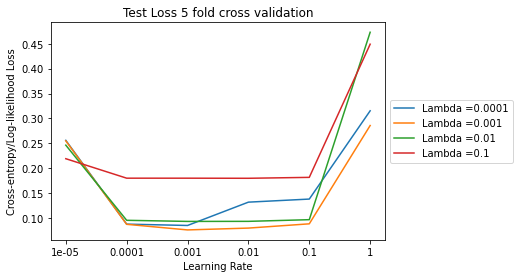

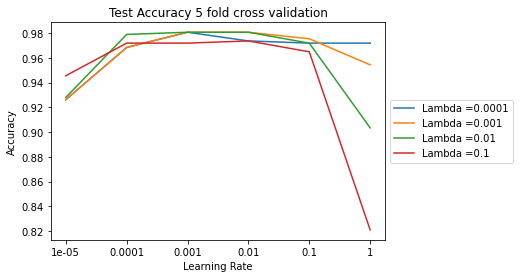

In [4]:
# Load the data
cancer = load_breast_cancer()
X, y =cancer.data,cancer.target

## Cross-validation based Logistic regression
ksplits = 5
kfold = KFold(n_splits = ksplits )
lr_eta = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
Lambdas = [1e-4, 1e-3, 1e-2, 1e-1]

est_test_acc = np.zeros((len(lr_eta), len(Lambdas) ))
est_test_loss = np.zeros((len(lr_eta), len(Lambdas) ))

for n_l, Lambda in  enumerate(Lambdas):
    for n_lr,lr in  enumerate(lr_eta):
        test_acc = np.zeros(ksplits)
        test_loss = np.zeros(ksplits)

        ## split the data into 5 folds and evaluate performance 
        for fold, (train_ind, test_ind) in enumerate(kfold.split(X)):
            X_train , X_test = X[train_ind], X[test_ind]
            y_train, y_test = y[train_ind], y[test_ind]

            ## Create design matrix with standard scaling
            X_train_scaled, X_test_scaled  = design_matrix(X_train, X_test)


            logreg = LogisticRegression(fit_intercept=False,
                      dimension= X_train_scaled.shape[1],
                      random_init=True,
                      reduction='mean',
                      l2_reg = True,
                      lbd= Lambda)
            
            optimizer = SGD(lr=lr)
            logreg.train( X_train_scaled, y_train, optimizer, batch_size = 1, epochs = 1000)     

            # find accuracy on test set with beta_opt
            y_pred_prob = np.zeros((len(y_test),2))
            y_pred_prob[:,1] = logreg.predict(X_test_scaled)
            y_pred_prob[:,0] = 1-logreg.predict(X_test_scaled)

            test_acc[fold] =  np.mean(np.argmax(y_pred_prob, axis=1)== y_test)
            test_loss[fold] = logreg.NLL_loss(X_test_scaled, y_test)
    
        est_test_acc[n_lr , n_l ] = np.mean(test_acc)
        est_test_loss[n_lr , n_l ] =  np.mean(test_loss)

print('Test Accuracy : \n', est_test_acc )
print('Test loss : \n', est_test_loss)

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_loss[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Cross-entropy/Log-likelihood Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test Loss 5 fold cross validation')
save_fig(plt, name ='g_testloss_SGD.png')
plt.show()

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_acc[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test Accuracy 5 fold cross validation')
save_fig(plt, name ='g_testaccuracy_SGD.png')
plt.show()

# Part g) Scikit Learn's Logistic Regression

### Logistic Regression with SGD

Test Accuracy : 
 [[0.95575221 0.95575221 0.95575221 0.95575221]
 [0.97345133 0.97345133 0.97345133 0.97345133]
 [0.99115044 0.99115044 0.99115044 0.98230088]
 [0.99115044 0.99115044 0.99115044 0.98230088]
 [0.97345133 0.97345133 0.95575221 0.97345133]
 [0.94690265 0.9380531  0.94690265 0.95575221]]
Test loss : 
 [[0.3318773  0.33192647 0.33240561 0.33980795]
 [0.18364357 0.18387464 0.18673017 0.21032577]
 [0.11532025 0.11683353 0.12296211 0.17479485]
 [0.07742867 0.07934201 0.09719568 0.17013733]
 [0.05755054 0.06569499 0.10131448 0.17808654]
 [0.32739395 0.45081089 0.22963665 0.13977318]]


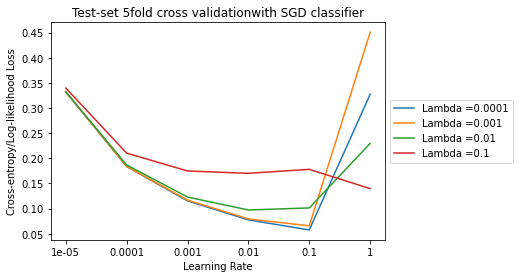

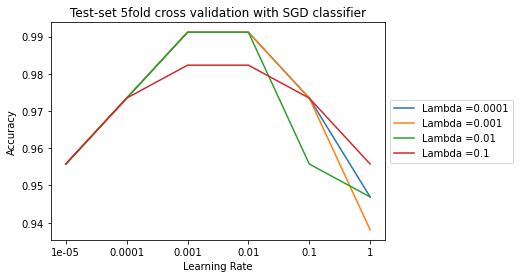

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Load the data
cancer = load_breast_cancer()

#now scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


est_test_loss_SGD = np.zeros((len(lr_eta), len(Lambdas) ))
est_test_acc_SGD = np.zeros((len(lr_eta), len(Lambdas) ))

# Logistic Regression
for n_lr,lr in enumerate(lr_eta):
    for n_l,Lambda in enumerate(Lambdas):  
        SGD_logistic = SGDClassifier(loss='log', penalty = 'l2', alpha=Lambda, fit_intercept= False, max_iter=1000,  learning_rate='constant', eta0= lr )  # with cross validation
        SGD_logistic.fit(X_train_scaled, y_train)
        est_test_acc_SGD[n_lr, n_l] = SGD_logistic.score(X_test_scaled,y_test)
        est_test_loss_SGD[n_lr, n_l] = log_loss(y_test, SGD_logistic.predict_proba(X_test_scaled))

print('Test Accuracy : \n', est_test_acc_SGD )
print('Test loss : \n', est_test_loss_SGD)

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_loss_SGD[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Cross-entropy/Log-likelihood Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test-set 5fold cross validationwith SGD classifier')
save_fig(plt, name ='g_testloss_sk_SGD.png')
plt.show()

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_acc_SGD[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test-set 5fold cross validation with SGD classifier')
save_fig(plt, name ='g_testaccuracy_sk_SGD.png')
plt.show()